In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv('/home/elearning/Desktop/Artificial_Intelligence_Code/1- DataSets/Students grades/Final_Scores_EST_To_Upload.csv')
df.head()

,Admission ID,English Name,Student ID,Passport,Nationality,Other Nationality,F,Grade,EST I total,EST I - Literacy,EST I - Mathematics,EST II - Math 1,EST II - Biology,EST II - Math 2,EST I - Essay
0,202208-006617,Donia Mohamed Abdelhamid Harfoush,3.050428e+13,A27523506,Egypt,NaN,F,11.0,1050.0,510.0,540.0,NaN,NaN,NaN,NaN
1,202208-006615,Rawan Walid Emad Abdelfattah,3.041027e+13,A27027252,Egypt,NaN,F,12.0,1170.0,520.0,650.0,NaN,NaN,NaN,NaN
2,202208-006614,Mohamed Hossam Mohamed Fathy Abdelmoneim Attia,3.050924e+13,A18687842,Egypt,NaN,M,11.0,1230.0,580.0,650.0,NaN,NaN,NaN,NaN
3,202208-006613,Salma Aly Mohamed Mohamed Abdo,3.030131e+13,NaN,Egypt,NaN,F,12.0,1320.0,650.0,670.0,NaN,NaN,NaN,NaN
4,202208-006609,Farah Mohamed Elsayed Elsheribni Elsheribni,3.040925e+13,A23127024,Egypt,NaN,F,11.0,1040.0,540.0,500.0,NaN,NaN,NaN,NaN


## EDA

    Deleting Unnecessary Columns

In [3]:
students = df.drop(columns=['Student ID', 'Passport', 'Nationality', 'Other Nationality'])
students.head()

,Admission ID,English Name,F,Grade,EST I total,EST I - Literacy,EST I - Mathematics,EST II - Math 1,EST II - Biology,EST II - Math 2,EST I - Essay
0,202208-006617,Donia Mohamed Abdelhamid Harfoush,F,11.0,1050.0,510.0,540.0,NaN,NaN,NaN,NaN
1,202208-006615,Rawan Walid Emad Abdelfattah,F,12.0,1170.0,520.0,650.0,NaN,NaN,NaN,NaN
2,202208-006614,Mohamed Hossam Mohamed Fathy Abdelmoneim Attia,M,11.0,1230.0,580.0,650.0,NaN,NaN,NaN,NaN
3,202208-006613,Salma Aly Mohamed Mohamed Abdo,F,12.0,1320.0,650.0,670.0,NaN,NaN,NaN,NaN
4,202208-006609,Farah Mohamed Elsayed Elsheribni Elsheribni,F,11.0,1040.0,540.0,500.0,NaN,NaN,NaN,NaN


    Renaming Columns

In [4]:
students.columns = ['id', 'name', 'gender', 'grade', 'total_marks', 'literacy', 'mathematics','math1', 'biology', 'math2', 'essay']

    Deleting non existant total grades

In [5]:
students = students[students['total_marks'].notna()]

    Transforming Grades to Percentages

In [6]:
def transform_to_percentage():
    students['percentage_total_marks'] = students['total_marks'].apply(lambda x: (x*100) / 1580)

transform_to_percentage()

    Classifying students based on abilities

In [7]:
def classify_ability(total_mark):
    
    if total_mark <= 45:
        return str('level 1')

    if 45 < total_mark < 60:
        return str('level 2')
    
    if 60<= total_mark < 70:
        return str('level 3')

    if 70 <= total_mark < 80:
        return str('level 4')

    if 80 <= total_mark < 85:
        return str('level 5')

    if 85 <= total_mark < 90:
        return str('level 6')

    if 90 <= total_mark < 95:
        return str('level 7')

    if 95 <= total_mark < 100:
        return str('level 8')

    Initializing new abilities column

In [8]:
def probability_measurement():
   students['ability'] = students['percentage_total_marks'].apply(lambda x: classify_ability(x))

probability_measurement()

students.head()

,id,name,gender,grade,total_marks,literacy,mathematics,math1,biology,math2,essay,percentage_total_marks,ability
0,202208-006617,Donia Mohamed Abdelhamid Harfoush,F,11.0,1050.0,510.0,540.0,NaN,NaN,NaN,NaN,66.455696,level 3
1,202208-006615,Rawan Walid Emad Abdelfattah,F,12.0,1170.0,520.0,650.0,NaN,NaN,NaN,NaN,74.050633,level 4
2,202208-006614,Mohamed Hossam Mohamed Fathy Abdelmoneim Attia,M,11.0,1230.0,580.0,650.0,NaN,NaN,NaN,NaN,77.848101,level 4
3,202208-006613,Salma Aly Mohamed Mohamed Abdo,F,12.0,1320.0,650.0,670.0,NaN,NaN,NaN,NaN,83.544304,level 5
4,202208-006609,Farah Mohamed Elsayed Elsheribni Elsheribni,F,11.0,1040.0,540.0,500.0,NaN,NaN,NaN,NaN,65.822785,level 3


    Calculacting values count for each ability

In [9]:
students_count_per_ability = students['ability'].value_counts()

In [10]:
students_count_per_ability

level 3    1613
level 2    1342
level 4     807
level 5     210
level 6      85
level 7      26
level 1       3
level 8       2
Name: ability, dtype: int64

    Calculating each ability value appearance in percentages

In [11]:
def ability_percentage(students_count_per_ability):
    percentages = []

    for index in students_count_per_ability.index.sort_values(ascending=True):
        percentages.append(students_count_per_ability[index] * 100 / students_count_per_ability.sum())

    return percentages

ability_percentage(students_count_per_ability)

[0.07338551859099804,
 32.827788649706456,
 39.456947162426616,
 19.740704500978474,
 5.136986301369863,
 2.079256360078278,
 0.6360078277886497,
 0.04892367906066536]

    Printing students' marks plot to number of students

<AxesSubplot:xlabel='percentage_total_marks', ylabel='Count'>

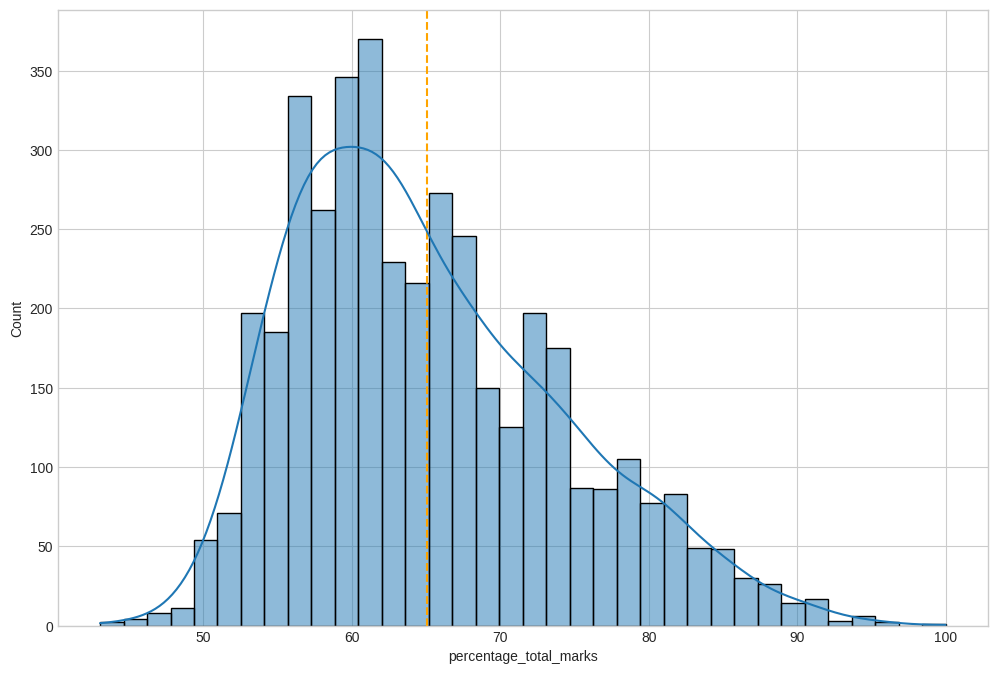

In [12]:
percentage_total_marks = students['percentage_total_marks'].describe()

plt.style.use('seaborn-whitegrid')

plt.subplots(figsize = (12, 8))

plt.axvline(x = percentage_total_marks['mean'], linestyle='--', color='orange',label='Test results mean')

sns.histplot(x = students['percentage_total_marks'] ,kde = True)

    Abilities distribution percentages to students

<AxesSubplot:>

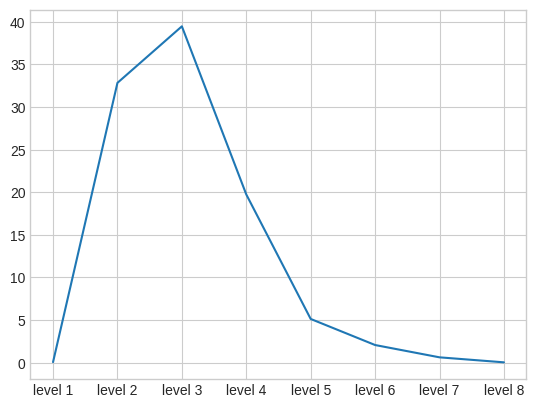

In [13]:
sns.lineplot(x=students['ability'].value_counts().index.sort_values(ascending=True), y=ability_percentage(students_count_per_ability))